In [1]:
from scipy.special import jv
import numpy as np
import matplotlib.pyplot as plt
from epoch_viz.viz import EpochViz

In [2]:
ez = EpochViz("run_2", ".temp")
ez.print_info()

Here are the some infomation about the data in the directory: run_2

Total number of sdf files: 2225
------------------------------------------------------------
Available data inside the sdf files:
	Ey	Ne	N
------------------------------------------------------------
Input deck information:
	Wavelength (m): 1.0000e-06
	Laser Width (tau): 2.0000e+01
	Max Time (tau): 4.0000e+01
	Dump Time Step (s): 6.0000e-17
	Normalized Vector Potential: 1.0000e+00
	Density Factor: 2.0000e+00
	Number of Grid Points: 2.1000e+04
	Minimum X (wavelength): -2.0000e+01
	Maximum X (wavelength): 1.0000e+01
	Thickness of Plasma (wavelength): 1.0000e+00
	Particles per Cell: 1.0000e+02
	Start Position of Plasma (wavelength): 0.0000e+00
	Temperature of Plasma (eV): 5.0000e+01
------------------------------------------------------------
Calculated Parameters:
	Box Size (m): 3.0000e-05
	Grid Spacing (m): 1.4286e-09
	Time Step (s): 4.5269e-18
	Run Time (s): 1.3343e-13
	Laser Frequency (Hz): 1.8837e+15
	Laser Width (s

In [14]:
data, T, X = ez.load_data(
    data_types=["Ey"],
    space_range=[10100, 10300, 10500],
    space_are_nodes=True,
    return_data=True,
    normalize=True,
    overwrite=True
)

Loading Data...: 100%|██████████| 2225/2225 [00:08<00:00, 277.45it/s]


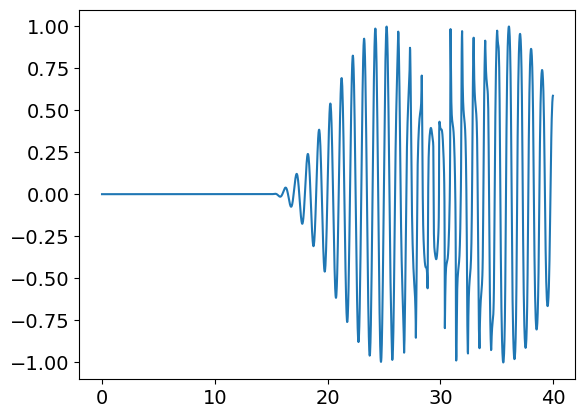

In [29]:
field = data["Ey"][:, -1]
plt.plot(T, field)

field_fft = np.fft.fft(field)
field_fft = np.abs(field_fft)
fft = np.fft.fftshift(field_fft)
fft = fft/max(fft)

In [64]:
omega_max = ez.calculated_parameters["omega_max"]

In [65]:
omega = np.linspace(-omega_max/2, omega_max/2, len(fft))

# Plots

$$
   S((2n+1)\omega_0) = (\pi E_0)^2\left(\frac{J_n((n+1)\xi)}{(n+1)}- \frac{J_{n+1}(n\xi)}{(n)}\right)^2

$$

$$
    S((2n+1)\omega_0) = (\pi E_0)^2\left(\frac{J_{n-1}(\frac{1}{2}(n+1)\xi)}{\frac{1}{2}(n+1)}- \frac{J_{n+1}\frac{1}{2}((n-1)\xi)}{\frac{1}{2}(n-1)}\right)^2
   $$

In [2]:
def odd(order, xi):
    n = (order-1)//2
    pi = np.pi
    E_0 = 1
    t0 = pi*E_0
    t1 = jv(n, (n+1)*xi)/(n+1)
    t2 = jv(n+1, (n)*xi)/(n)
    return (t0*(t1-t2))**2

In [3]:
def even(order, xi):
    n = order
    pi = np.pi
    E_0 = 1
    t0 = pi*E_0
    t1 = (jv(n-1, (n+1)*xi/2)/((n+1)/2))
    t2 = (jv(n+1, (n-1)*xi/2)/((n-1)/2))
    return (t0*(t1-t2))**2

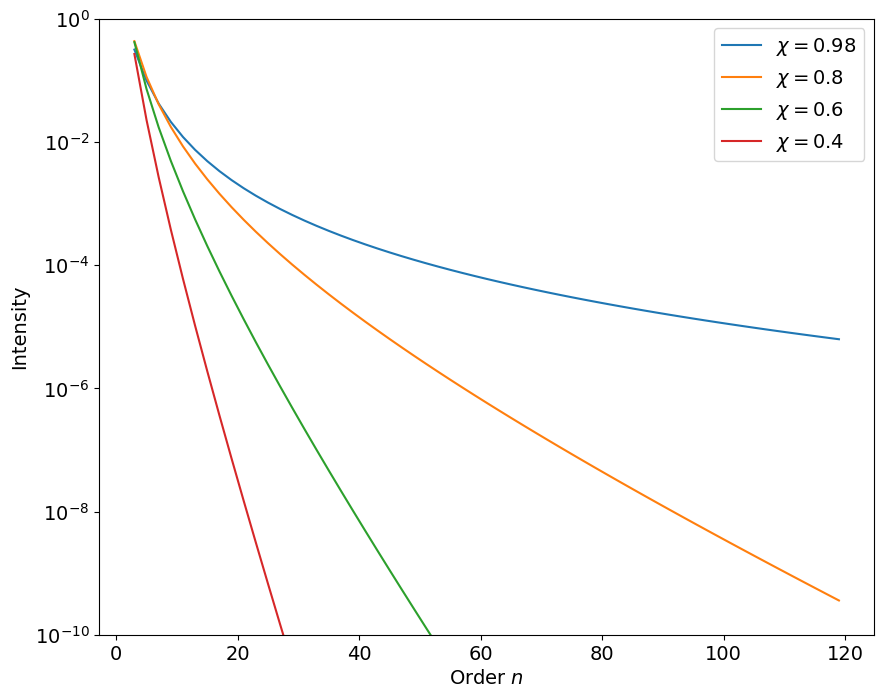

In [4]:
order = np.arange(3, 121, 2)
xi_1 = 0.98
intensities_1 = odd(order, xi_1)
xi_2 = 0.8
intensities_2 = odd(order, xi_2)
xi_3 = 0.6
intensities_3 = odd(order, xi_3)
xi_4 = 0.4
intensities_4 = odd(order, xi_4)

plt.figure(figsize=(10, 8))
plt.plot(order, intensities_1, label='$\chi = 0.98$')
plt.plot(order, intensities_2, label='$\chi = 0.8$')
plt.plot(order, intensities_3, label='$\chi = 0.6$')
plt.plot(order, intensities_4, label='$\chi = 0.4$')
plt.legend()
plt.yscale('log')
plt.xlabel("Order $n$")
plt.ylabel("Intensity")
plt.ylim(1e-10,1);

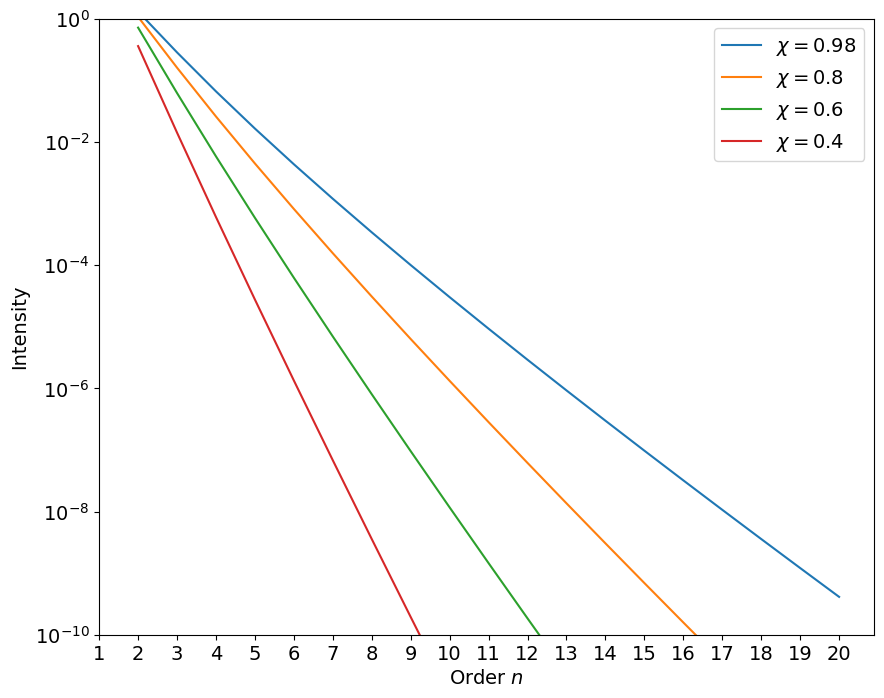

In [5]:
order = np.arange(2, 21)
xi_1 = 0.98
intensities_1 = even(order, xi_1)
xi_2 = 0.8
intensities_2 = even(order, xi_2)
xi_3 = 0.6
intensities_3 = even(order, xi_3)
xi_4 = 0.4
intensities_4 = even(order, xi_4)

plt.figure(figsize=(10, 8))
plt.plot(order, intensities_1, label='$\chi = 0.98$')
plt.plot(order, intensities_2, label='$\chi = 0.8$')
plt.plot(order, intensities_3, label='$\chi = 0.6$')
plt.plot(order, intensities_4, label='$\chi = 0.4$')
plt.legend()
plt.xlabel("Order $n$")
plt.ylabel("Intensity")
plt.yscale('log')
plt.xticks(np.arange(1,21,1))
plt.ylim(1e-10,1);

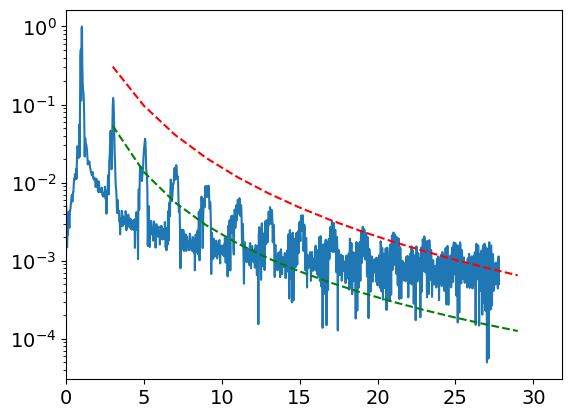

In [106]:
orders = np.arange(3, np.ceil(omega_max/2)+2, 2)
xi = 0.99
odd_Is = odd(orders, xi)
Is = 1/(np.power(orders, 8/3))
fig, ax = plt.subplots()
ax.plot(omega, fft)
ax.plot(orders, odd_Is, "r--")
ax.plot(orders, Is, "g--")
ax.set_yscale("log")
ax.set_xlim(0, );

In [6]:
def odd(order, xi):
    n = (order-1)//2

    pi = np.pi
    E_0 = 1
    return ((pi*E_0)*(jv(n, (n+1)*xi)/(n+1) - jv(n+1, (n)*xi)/(n)))**2

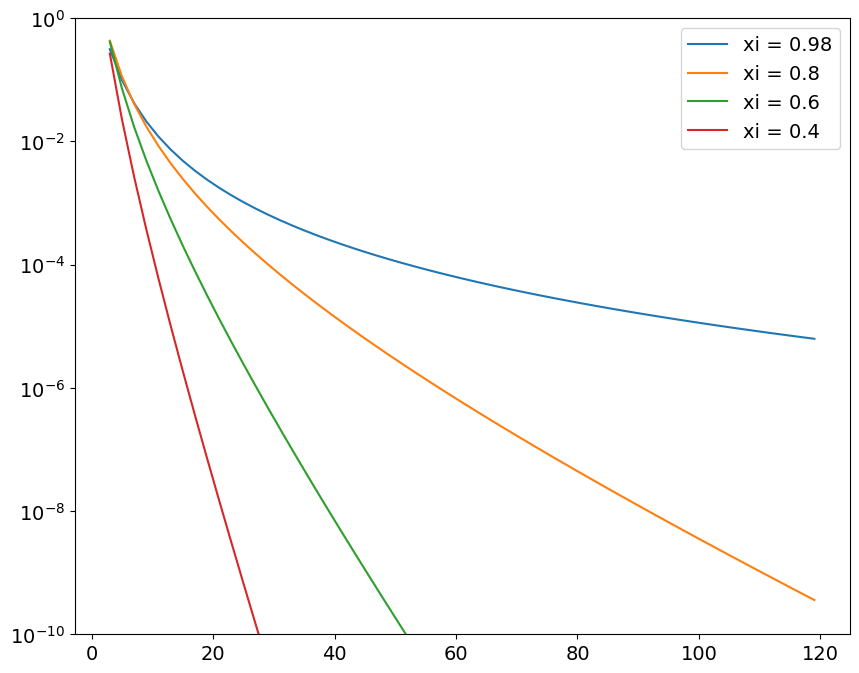

In [7]:
order = np.arange(3, 121, 2)
xi_1 = 0.98
intensities_1 = odd(order, xi_1)
xi_2 = 0.8
intensities_2 = odd(order, xi_2)
xi_3 = 0.6
intensities_3 = odd(order, xi_3)
xi_4 = 0.4
intensities_4 = odd(order, xi_4)

plt.figure(figsize=(10, 8))
plt.plot(order, intensities_1, label='xi = 0.98')
plt.plot(order, intensities_2, label='xi = 0.8')
plt.plot(order, intensities_3, label='xi = 0.6')
plt.plot(order, intensities_4, label='xi = 0.4')
plt.legend()
plt.yscale('log')
plt.ylim(1e-10,1);